In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('valence.csv',index_col=0)#读取CSV文件并将第一列song_id作为index
#arousal = pd.read_csv('tsfresh/arousal.csv',index_col=0)

In [3]:
data.head()

,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,sample_19500ms,...,sample_621500ms,sample_622000ms,sample_622500ms,sample_623000ms,sample_623500ms,sample_624000ms,sample_624500ms,sample_625000ms,sample_625500ms,sample_626000ms
song_id,,,,,,,,,,,,,,,,,,,,,
2,-0.073341,-0.074661,-0.074077,-0.078154,-0.081588,-0.080873,-0.083611,-0.082145,-0.081632,-0.083874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.189702,-0.187765,-0.183740,-0.188761,-0.193704,-0.190834,-0.189041,-0.197554,-0.202871,-0.209757,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.154286,0.148063,0.146956,0.151180,0.135942,0.076832,0.084487,0.088513,0.090944,0.085544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.149053,0.148260,0.147369,0.146956,0.147857,0.146927,0.145651,0.145795,0.146420,0.152565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.342816,0.345193,0.332023,0.328887,0.327603,0.329011,0.327883,0.334822,0.328447,0.344121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_2040=data.loc[2040]#arousal_mean=7
data_2041=data.loc[2041]#arousal_mean=3
data_2006=data.loc[2006]#arousal_mean=3.2
#data_2001=data_2001.loc(~pd.isnull(data_2001))
#data_2001.columns=['2001']
#去除空值
data_2040_notnull=data_2040.notnull()
data_2040=data_2040[data_2040_notnull]
#data_2001.dropna(axis=0,how='any')
data_2041_notnull=data_2041.notnull()
data_2041=data_2041[data_2041_notnull]
 
data_2006_notnull=data_2006.notnull()
data_2006=data_2006[data_2006_notnull]
data_2006

sample_15000ms     0.248
sample_15500ms     0.246
sample_16000ms     0.246
sample_16500ms     0.248
sample_17000ms     0.200
                   ...  
sample_162000ms   -0.076
sample_162500ms   -0.094
sample_163000ms   -0.104
sample_163500ms   -0.116
sample_164000ms   -0.124
Name: 2006, Length: 299, dtype: float64

Text(0, 0.5, 'arousal')

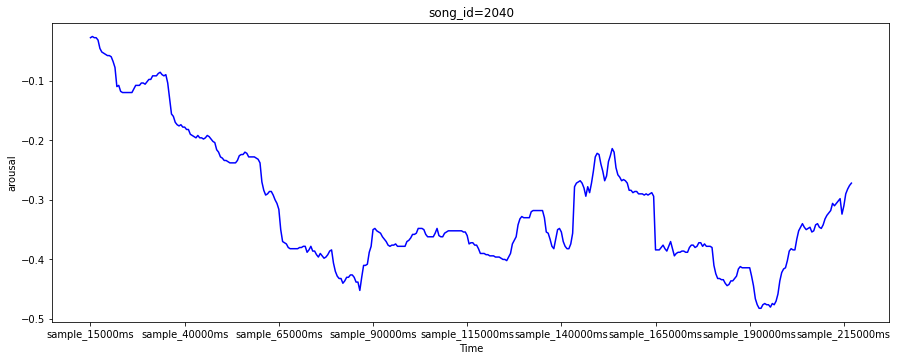

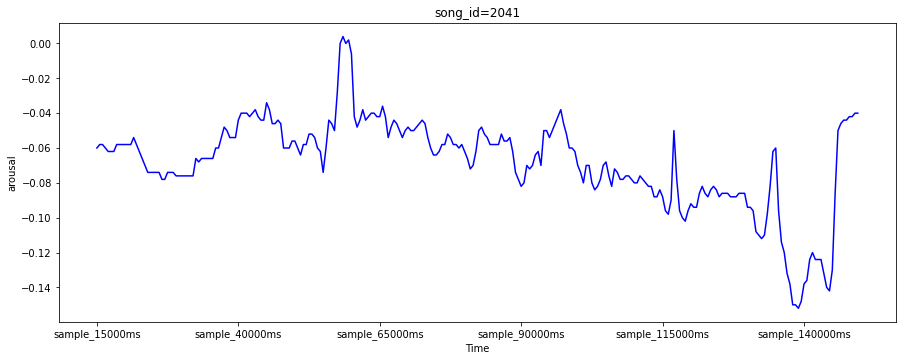

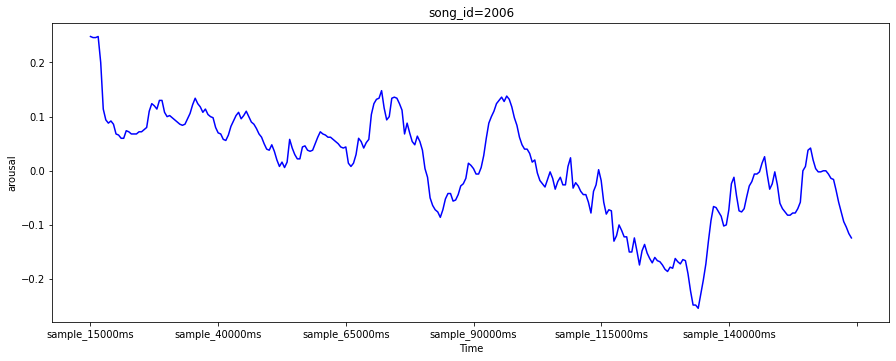

In [5]:
plt.figure(figsize=(15, 5.5))
data_2040.plot(color='b')
plt.title('song_id=2040')
plt.xlabel('Time')
plt.ylabel('arousal')
#plt.xticks(rotation=30)
plt.figure(figsize=(15, 5.5))
data_2041.plot(color='b')
plt.title('song_id=2041')
plt.xlabel('Time')
plt.ylabel('arousal')

plt.figure(figsize=(15, 5.5))
data_2006.plot(color='b')
plt.title('song_id=2006')
plt.xlabel('Time')
plt.ylabel('arousal')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series
from tslearn import metrics
from tslearn.piecewise import PiecewiseAggregateApproximation

ts_2040=to_time_series(data_2040)
ts_2041=to_time_series(data_2041)
ts_2006=to_time_series(data_2006)
dataset1=[ts_2040]
dataset2=[ts_2041]
dataset3=[ts_2006]
paa1 = PiecewiseAggregateApproximation(27)
paa_2040 = paa1.fit_transform(dataset1)
paa2 = PiecewiseAggregateApproximation(18)
paa_2041 = paa2.fit_transform(dataset2)
paa3 = PiecewiseAggregateApproximation(23)
paa_2006 = paa3.fit_transform(dataset3)
a=paa_2040.flatten()
b=paa_2041.flatten()
c=paa_2006.flatten()

0.4775282289193579


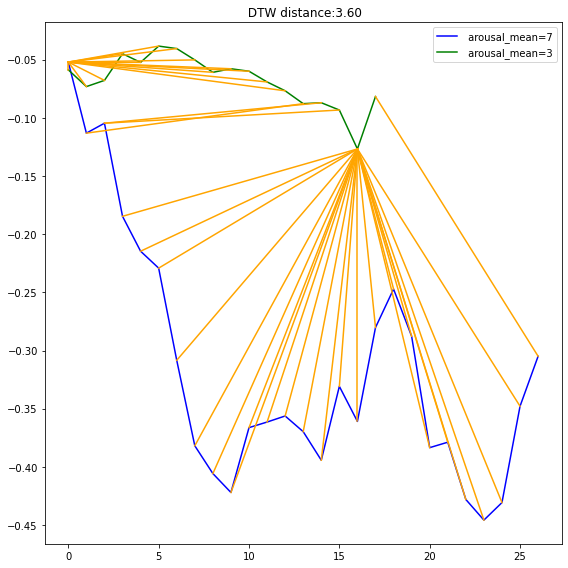

In [7]:
paa_2040 =pd.Series(a)
paa_2041 =pd.Series(b)
paa_2006 =pd.Series(c)
dis1=metrics.dtw(paa_2040,paa_2041)
dis2=metrics.dtw(paa_2006,paa_2041)
print(dis2)
dtw_path, sim_dtw = metrics.dtw_path(paa_2040,paa_2041)
plt.figure(figsize=(8, 8))

plt.plot(paa_2040, "b-", label=' arousal_mean=7')
plt.plot(paa_2041, "g-", label=' arousal_mean=3')
for positions in dtw_path:
    plt.plot([positions[0], positions[1]],
            [paa_2040[positions[0]], paa_2041[positions[1]]], color='orange')

plt.legend()
plt.title(" DTW distance:3.60")

plt.tight_layout()
#plt.savefig('./DTW73.png')
plt.show()

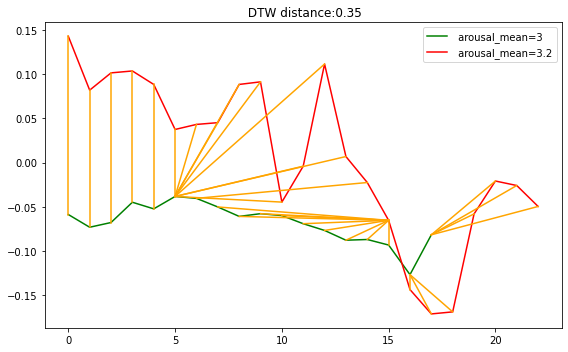

In [8]:
#paa_2006=paa_2006+0.5
dtw_path, sim_dtw = metrics.dtw_path(paa_2041,paa_2006)
plt.figure(figsize=(8, 5))

plt.plot(paa_2041, "g-", label=' arousal_mean=3')
plt.plot(paa_2006, "r-", label=' arousal_mean=3.2')
for positions in dtw_path:
    plt.plot([positions[0], positions[1]],
            [paa_2041[positions[0]], paa_2006[positions[1]]], color='orange')

plt.legend()
plt.title(" DTW distance:0.35")

plt.tight_layout()
plt.savefig('./DTW330.png')
plt.show()

In [9]:
data_2001=data.loc[2001]
data_2001_notnull=data_2001.notnull()
data_2001=data_2001[data_2001_notnull]
data_2001

sample_15000ms    -0.106
sample_15500ms    -0.108
sample_16000ms    -0.108
sample_16500ms    -0.102
sample_17000ms    -0.100
                   ...  
sample_298500ms   -0.518
sample_299000ms   -0.496
sample_299500ms   -0.458
sample_300000ms   -0.412
sample_300500ms   -0.398
Name: 2001, Length: 572, dtype: float64

Text(0.5, 1.0, 'PAA')

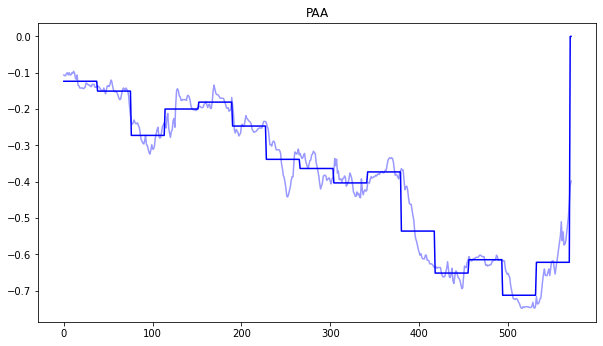

In [10]:
#PAA
from tslearn.utils import to_time_series_dataset
from tslearn.piecewise import PiecewiseAggregateApproximation
segment = 15 #60个数分为15段,4个数（2s）为一段 
paa = PiecewiseAggregateApproximation(segment)
ts_2001=to_time_series_dataset(data_2001)
paa_arousal = paa.fit_transform(ts_2001)
#paa_arousal.reshape(-1,segment)
paa_arousal_inv = paa.inverse_transform(paa_arousal)
plt.figure(figsize=(10, 5.5)) 
plt.plot(ts_2001.ravel(), "b-", alpha=0.4)
plt.plot(paa_arousal_inv[0].ravel(), "b-")
plt.title("PAA")
#如果点数/段数 不为整数时，paa最后剩余的点为0

Text(0, 0.5, 'Autocorrelation function')

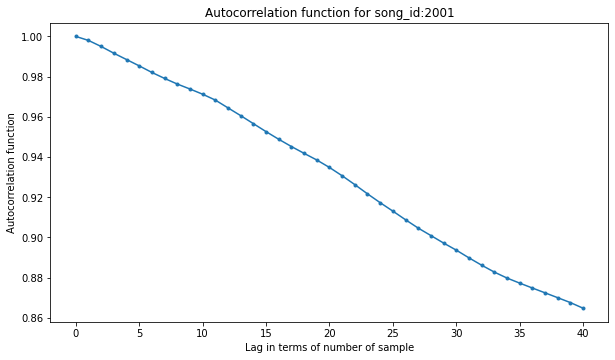

In [11]:
lag=range(0,41)
data_2001_acf=[]
for l in lag:
    data_2001_acf.append(data_2001.autocorr(l))
plt.figure(figsize=(10,5.5))
plt.plot(data_2001_acf,marker='.')
plt.title('Autocorrelation function for song_id:2001')
plt.xlabel('Lag in terms of number of sample')
plt.ylabel('Autocorrelation function')

Text(0.5, 1.0, 'moving average')

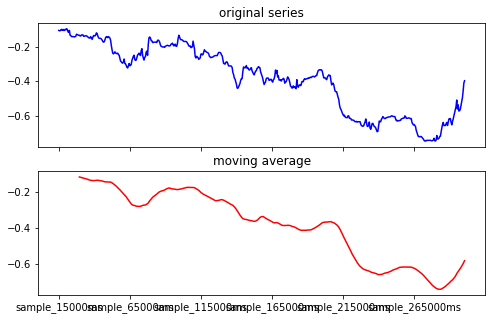

In [12]:
data2001_moving_average = data_2001.rolling(30).mean()
fig, axarr = plt.subplots(2, sharex=True)
fig.set_size_inches(8, 5,5)
data_2001.plot(ax=axarr[0], color='b')
axarr[0].set_title('original series')

data2001_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('moving average')

Trend model coefficient=[-2.18627171e-06] and intercept=[-0.04099676]


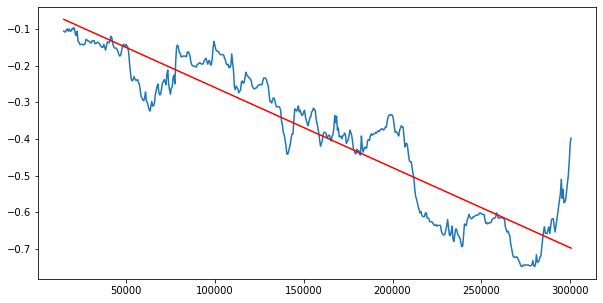

In [13]:
#用线性回归拟合长期趋势
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True,fit_intercept=True)

time=[]
for i in range(data_2001.size):
    time.append(15000+i*500)
data_2001.index=time
dict_data={'time':data_2001.index,'arousal':data_2001.values}
df_2001=pd.DataFrame(dict_data)#将series转为dataframe

trend_model.fit(np.array(df_2001['time']).reshape(-1,1),np.array(df_2001['arousal']).reshape(-1,1))
df_2001_pred = trend_model.predict(np.array(df_2001['time']).reshape(-1,1))
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],trend_model.intercept_))
plt.figure(figsize=(10,5))
plt.plot(df_2001['time'],df_2001['arousal'])
plt.plot(df_2001['time'],df_2001_pred, color="r")
plt.show()

In [14]:
'''
ADF检验平稳性
'''
from statsmodels.tsa import stattools
adf_result = stattools.adfuller(df_2001['arousal'], autolag='AIC')
print('ADF test statistic:',adf_result[0])
print('置信区间下的临界值:',adf_result[4])#T statistic小于临界值或P值接近0说明平稳
#六个数依次为ADF test statistic, p-value, Lags, 用于ADF回归的观测值的个数，在99% 95% 90%置信区间下的临界值，最后一个？？)
#结果为：接受原假设，即序列存在单位根，不平稳

ADF test statistic: -1.6508842074488663
置信区间下的临界值: {'1%': -3.4421235439968862, '5%': -2.866733577794069, '10%': -2.569536010842615}


In [15]:
adf_result = stattools.adfuller(df_2001['arousal'].diff(1)[1:])
print('ADF test statistic:',adf_result[0])
print('置信区间下的临界值:',adf_result[4])
#一阶差分后平稳

ADF test statistic: -4.623760653608412
置信区间下的临界值: {'1%': -3.4421235439968862, '5%': -2.866733577794069, '10%': -2.569536010842615}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  import sys


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

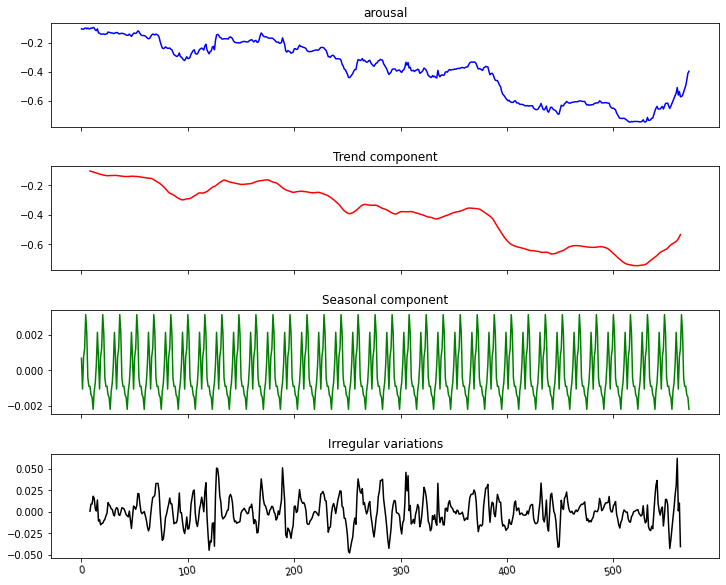

In [16]:
'''
用statsmodels.tsa进行时间序列分解-加法模型
乘法模型:Multiplicative seasonality is not appropriate for zero and negative values
'''
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
decompose_model = seasonal.seasonal_decompose(df_2001['arousal'].tolist(),freq=16,model='additive')#freq是按照经验预设的
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(10, 8)

df_2001['arousal'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('arousal')

pd.Series(data=decompose_model.trend, index=df_2001.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component')

pd.Series(data=decompose_model.seasonal, index=df_2001.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component')

pd.Series(data=decompose_model.resid, index=df_2001.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.xticks(rotation=10)

In [17]:
resid=decompose_model.resid
resid=resid[~np.isnan(resid)]#去除空值
print(resid.size)
adf_result = stattools.adfuller(resid, autolag='AIC')
print(adf_result)

556
(-9.096433393053978, 3.704217220681734e-15, 13, 542, {'1%': -3.442472769145813, '5%': -2.8668873212324817, '10%': -2.5696179384812297}, -3430.2511932270495)


Number of rows with at least one missing values: 0
Shape after removing missing values: (572, 2)
MSE of Single_Exponential: 3.554372343085695e-05 
 MSE of Double_Exponential: 4.558933204846446e-05 
 MSE of Triple_Exponential: 2.5908034609984322e-05


Text(0.5, 1.0, 'Actual Vs Triple Smoothing Forecasting')

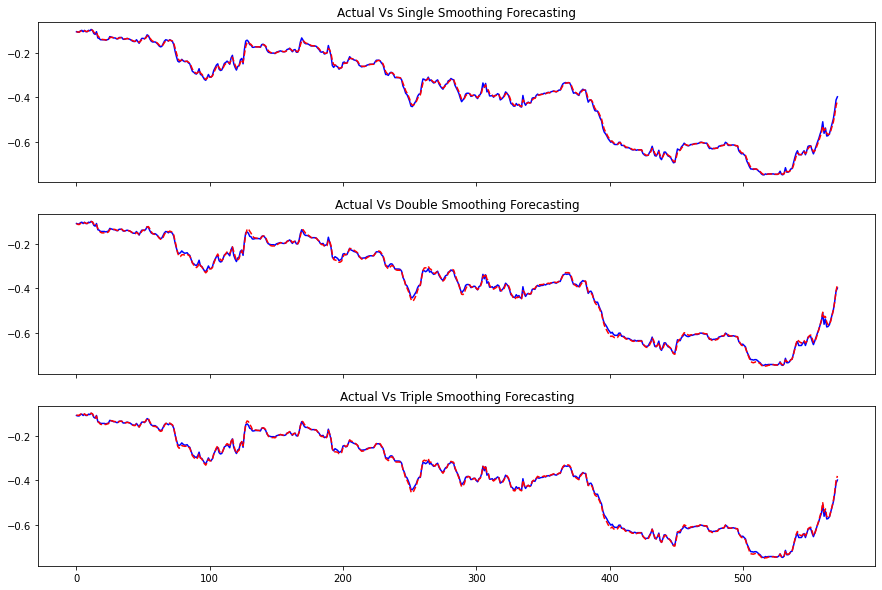

In [18]:
'''
指数平滑
'''
from sklearn import metrics
#Remove missing values
missing = (pd.isnull(df_2001['time'])) | (pd.isnull(df_2001['arousal']))
print('Number of rows with at least one missing values:', missing.sum())
df_2001 = df_2001.loc[~missing, :]
print('Shape after removing missing values:', df_2001.shape)

# Capture trend component
def initialize_T(x, seasonLength):
    total=0.0
    for i in range(seasonLength):
        total+=float(x[i+seasonLength]-x[i])/seasonLength
    return total


# Initialize seasonal component
def initialize_seasonalilty(x, seasonLength):
    seasons={}
    seasonsMean=[]
    num_season=int(len(x)/seasonLength)
    # Compute season average
    for i in range(num_season):
        seasonsMean.append(sum(x[seasonLength*i:seasonLength*i+seasonLength])/float(seasonLength))
    # compute season intial values
    for i in range(seasonLength):
        tot=0.0
        for j in range(num_season):
            tot+=x[seasonLength*j+i]-seasonsMean[j]
        seasons[i]=tot/num_season
    return seasons

# Function for Single exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # 初始值设为序列第一个值
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F
# Function for double exponential smoothing
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat
# Function for Triple Exponential Smoothing 
def triple_exp_smoothing(x, seasonLength, alpha, beta, gamma, h):
    yhat=[]
    S = initialize_seasonalilty(x, seasonLength)
    for i in range(len(x)+h):
        if i == 0:
            F = x[0]
            T = initialize_T(x, seasonLength)
            yhat.append(x[0])
            continue
        if i >= len(x):
            m = i - len(x) + 1
            yhat.append((F + m*T) + S[i%seasonLength])
        else:
            obsval = x[i]
            F_last, F= F, alpha*(obsval-S[i%seasonLength]) + (1-alpha)*(F+T)
            T = beta * (F-F_last) + (1-beta)*T
            S[i%seasonLength] = gamma*(obsval-F) + (1-gamma)*S[i%seasonLength]
            yhat.append(F+T+S[i%seasonLength])
    return yhat
df_2001['Single_Exponential_Forecast'] = single_exp_smoothing(df_2001['arousal'], 0.6)
df_2001['Double_Exponential_Forecast'] = double_exp_smoothing(df_2001['arousal'], 0.6, 0.2)
df_2001['Triple_Exponential_Forecast'] = triple_exp_smoothing(df_2001['arousal'], 4, 0.6, 0.2, 0.5, 0)[:572]
###计算三种平滑的MSE——调整平滑的参数
MSE_Single_Exponential=metrics.mean_squared_error(df_2001['arousal'],df_2001['Single_Exponential_Forecast'])
MSE_Double_Exponential=metrics.mean_squared_error(df_2001['arousal'],df_2001['Double_Exponential_Forecast'])
MSE_Triple_Exponential=metrics.mean_squared_error(df_2001['arousal'],df_2001['Triple_Exponential_Forecast'])
print('MSE of Single_Exponential:',MSE_Single_Exponential,'\n','MSE of Double_Exponential:',\
      MSE_Double_Exponential,'\n','MSE of Triple_Exponential:',MSE_Triple_Exponential)
### Plot Exponential Smoothing VS Actual value
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(15, 10)
df_2001['arousal'].plot(color='b', linestyle = '-', ax=axarr[0])
df_2001['Single_Exponential_Forecast'].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Single Smoothing Forecasting')

df_2001['arousal'].plot(color='b', linestyle = '-', ax=axarr[1])
df_2001['Double_Exponential_Forecast'].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Double Smoothing Forecasting')

df_2001['arousal'].plot(color='b', linestyle = '-', ax=axarr[2])
df_2001['Triple_Exponential_Forecast'].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Actual Vs Triple Smoothing Forecasting')

ADF Statistic: -4.623761
p-value: 0.000117


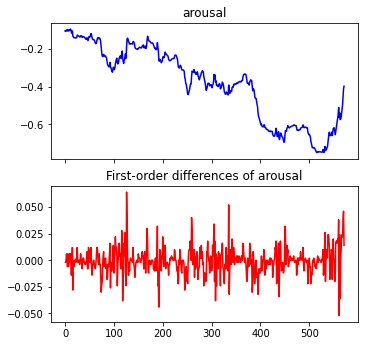

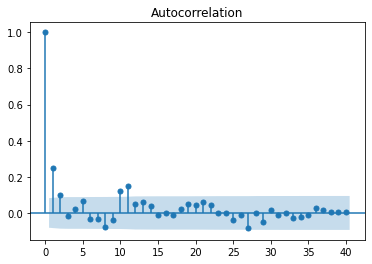

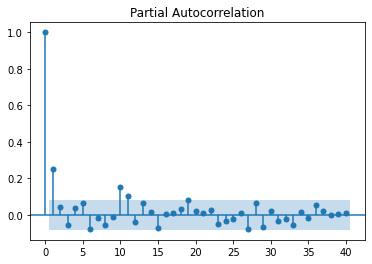

In [19]:
'''
用ARIMA模型拟合
'''
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa import stattools
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
#Let us plot the original time series and first-differences
first_order_diff = df_2001['arousal'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
df_2001['arousal'].plot(ax=ax[0], color='b')
ax[0].set_title('arousal')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of arousal')

# plot signal
plot_acf(first_order_diff,lags=40)
plot_pacf(first_order_diff,lags=40)
adf_result= stattools.adfuller(first_order_diff)#一阶差分后平稳
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
# Optimize ARMA parameters
aicVal=[]
for d in range(1,2):
    for ari in range(0,9):
        for maj in range(0,9):
            try:
                arima_obj = ARIMA(df_2001['arousal'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [20]:
aicVal_aic=np.array(aicVal)[:,3]
print(np.where(aicVal_aic==min(aicVal_aic)))
print(aicVal[72])
arima_obj = ARIMA(df_2001['arousal'].tolist(), order=(8,1,5))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

(array([44]),)
[8, 1, 0, -3430.7921355519125]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  572
Model:                 ARIMA(8, 1, 5)   Log Likelihood                1731.846
Date:                Fri, 10 Dec 2021   AIC                          -3435.692
Time:                        08:35:12   BIC                          -3374.829
Sample:                             0   HQIC                         -3411.947
                                - 572                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6100      0.286      2.131      0.033       0.049       1.171
ar.L2         -0.6546      0.277     -2.360      0.018      -1.198      -0.111
ar.L3          0.2012      0.328      0.613      0.540      -0.442       0.844
ar.L4         -0.2766      0.329     -0.841      0.400      -0.921       0.368
ar.L5         -0.1858      0.287     -0.648      0.517      -0.747       0.376
ar.L6         -0.0053      0.083     -0.065      0.948      -0.167       0.157
ar.L7          0.0428      0.065      0.659      0.510      -0.085       0.170
ar.L8         -0.1664      0.049     -3.374      0.001      -0.263      -0.070
ma.L1         -0.3817      0.295     -1.293      0.196      -0.960       0.197
ma.L2          0.6308      0.242      2.605      0.009       0.156       1.105
ma.L3         -0.1471      0.294     -0.501      0.616      -0.723       0.428
ma.L4          0.3476      0.278      1.250      0.211      -0.197       0.893
ma.L5          0.2502      0.272      0.920      0.358      -0.283       0.783
sigma2         0.0001   5.66e-06     23.950      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               518.93
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

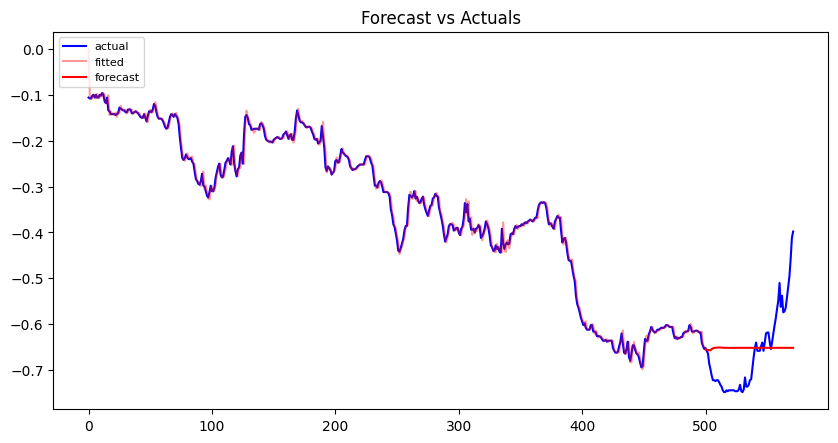

In [21]:
arima_obj = ARIMA(df_2001['arousal'][:500].tolist(), order=(8,1,0))
arima_obj_fit = arima_obj.fit()
fc = arima_obj_fit.forecast(72)
fc_series = pd.Series(fc, index=df_2001['arousal'][500:].index)
# Plot
pred=np.append([],arima_obj_fit.fittedvalues.tolist())
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_2001['arousal'],"b-",label='actual')
plt.plot(pred,"r-",label='fitted',alpha=0.4)
plt.plot(fc_series, "r-",label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

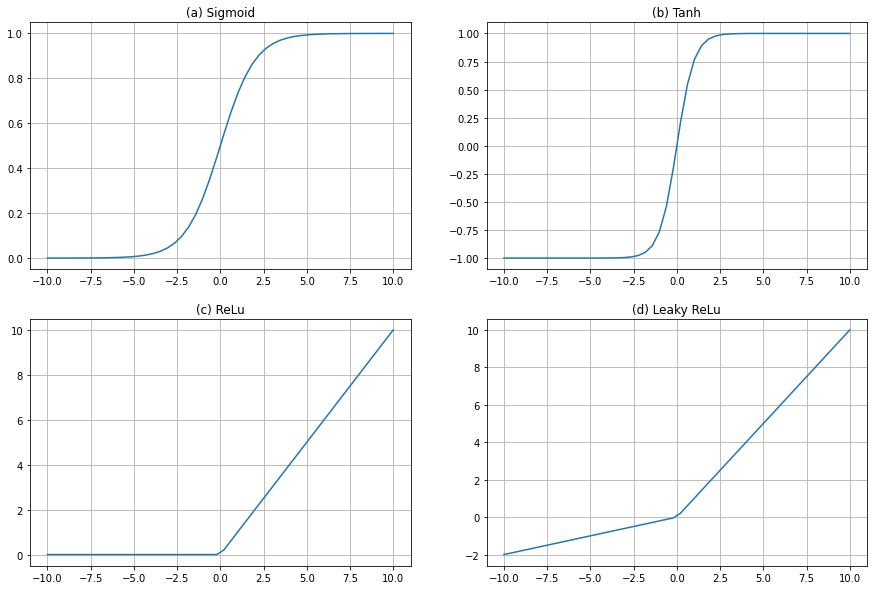

In [22]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig = plt.figure()
fig.set_size_inches(15, 10)
# plot sigmoid
ax = fig.add_subplot(221)
ax.plot(x,y_sigmoid)
ax.grid()
ax.set_title('(a) Sigmoid')

# plot tanh
ax = fig.add_subplot(222)
ax.plot(x,y_tanh)
ax.grid()
ax.set_title('(b) Tanh')

# plot relu
ax = fig.add_subplot(223)
y_relu = np.array([0*item  if item<0 else item for item in x ]) 
ax.plot(x,y_relu)
ax.grid()
ax.set_title('(c) ReLu')

#plot leaky relu
ax = fig.add_subplot(224)
y_relu = np.array([0.2*item  if item<0 else item for item in x ]) 
ax.plot(x,y_relu)
ax.grid()
ax.set_title('(d) Leaky ReLu')
plt.show()

Text(0.5, 1.0, 'Box plot of arousal')

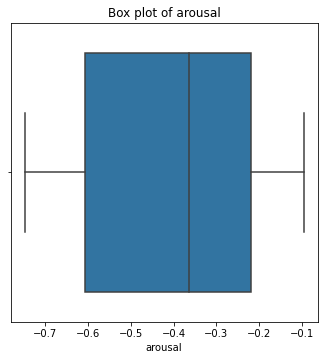

In [23]:
#画箱型图观察是否有异常值。如有异常值选MAE为损失函数，因为MSE受异常值影响较大
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df_2001['arousal'])
g.set_title('Box plot of arousal')

In [24]:
'''
使用MLP进行时间序列预测
对数据进行预处理，用前七个时间步长的数据预测下一个时间点的数据
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))#数据缩放在[-1,1]之间，梯度下降收敛更快
df_2001['scaled_arousal'] = scaler.fit_transform(np.array(df_2001['arousal']).reshape(-1, 1))
df_train = df_2001['scaled_arousal'][:500]
df_val = df_2001['scaled_arousal'][500:]
df_val.reset_index(drop=True, inplace=True)#这里遇到的问题：需要把后边72个数的index变为从0开始
                                            #否则y.append(ts.loc[i])中的i是从7开始，而索引从500开始
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y
X_train, y_train = makeXy(df_train,7)
print('Shape of train arrays:', X_train.shape, y_train.shape)
X_val, y_val = makeXy(df_val, 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of train: (500,)
Shape of test: (72,)
Shape of train arrays: (493, 7) (493,)
Shape of validation arrays: (65, 7) (65,)


In [25]:
from keras.layers import Dense, Input, Dropout
#from keras.optimizers import RMSprop
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [26]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,), dtype='float32')
#Dense layers are defined with linear activation
dense1 = Dense(16, activation='tanh')(input_layer)
dense2 = Dense(8, activation='tanh')(dense1)
dense3 = Dense(8, activation='tanh')(dense2)
dropout_layer = Dropout(0.2)(dense3)#dropout 20% of randomly selected input features.
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 345
Trainable params: 345
Non-trainable params: 0
_______________________________________________________________

In [27]:
save_weights_at = os.path.join('keras_models', '2001_arousal_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
#save_weights_at为保存模型的路径，以.hdf5或.h5为数据存储的格式，如keras_models\2001_arousal_MLP_weights.01-0.0406.hdf5
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=1,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)#verbose默认为0即不输出epoch模型保存信息；
                                    # period：CheckPoint之间间隔的epoch数；
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,#batch_size是训练集中用于反向传播的个数
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
31/31 [==============================] - 15s 16ms/step - loss: 0.4161 - val_loss: 0.1793

Epoch 00001: val_loss improved from inf to 0.17931, saving model to keras_models/2001_arousal_MLP_weights.01-0.1793.hdf5
Epoch 2/20
31/31 [==============================] - 0s 2ms/step - loss: 0.1569 - val_loss: 0.1873

Epoch 00002: val_loss did not improve from 0.17931
Epoch 3/20
31/31 [==============================] - 0s 2ms/step - loss: 0.1236 - val_loss: 0.1422

Epoch 00003: val_loss improved from 0.17931 to 0.14224, saving model to keras_models/2001_arousal_MLP_weights.03-0.1422.hdf5
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.1043 - val_loss: 0.1446

Epoch 00004: val_loss did not improve from 0.14224
Epoch 5/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0999 - val_loss: 0.1376

Epoch 00005: val_loss improved from 0.14224 to 0.13760, saving model to keras_models/2001_arousal_MLP_weights.05-0.1376.hdf5
Epoch 6/20
31/31 [============

In [31]:
'''
利用模型对测试集数据进行预测，并计算MAE
'''
from sklearn.metrics import mean_absolute_error
best_model = load_model(os.path.join('keras_models', '2001_arousal_MLP_weights.19-0.0850.hdf5'))
preds = best_model.predict(X_val)
pred_2001_arousal = scaler.inverse_transform(preds)
pred_2001_arousal = np.squeeze(preds)#squeeze去掉shape中为1的维度，即缩减维度
mae = mean_absolute_error(df_val.loc[7:], pred_2001_arousal)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 0.085


Text(0.5, 0, 'Index')

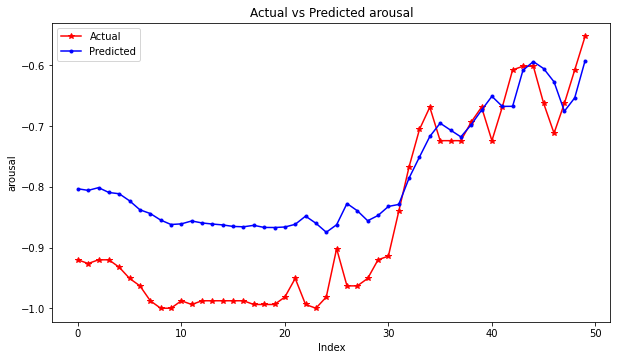

In [32]:
#画实际值和预测值的对比图
plt.figure(figsize=(10, 5.5))
plt.plot(range(50), df_val.loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_2001_arousal[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted arousal')
plt.ylabel('arousal')
plt.xlabel('Index')

In [33]:
'''
使用LSTM进行时间序列预测
'''
from keras.layers.recurrent import LSTM
input_layer = Input(shape=(7,1), dtype='float32')
lstm_layer = LSTM(64, input_shape=(7,1), return_sequences=False)(input_layer)
dropout_layer = Dropout(0.2)(lstm_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mae', optimizer='adam')
ts_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [34]:
save_weights_at = os.path.join('keras_models', '2001_arousal_LSTM_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=1,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
31/31 [==============================] - 10s 44ms/step - loss: 0.3841 - val_loss: 0.2481

Epoch 00001: val_loss improved from inf to 0.24809, saving model to keras_models/2001_arousal_LSTM_weights.01-0.2481.hdf5
Epoch 2/20
31/31 [==============================] - 1s 17ms/step - loss: 0.0818 - val_loss: 0.0889

Epoch 00002: val_loss improved from 0.24809 to 0.08886, saving model to keras_models/2001_arousal_LSTM_weights.02-0.0889.hdf5
Epoch 3/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0714 - val_loss: 0.0848

Epoch 00003: val_loss improved from 0.08886 to 0.08478, saving model to keras_models/2001_arousal_LSTM_weights.03-0.0848.hdf5
Epoch 4/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0662 - val_loss: 0.0784

Epoch 00004: val_loss improved from 0.08478 to 0.07839, saving model to keras_models/2001_arousal_LSTM_weights.04-0.0784.hdf5
Epoch 5/20
31/31 [==============================] - 1s 20ms/step - loss: 0.0582 - val_loss: 0.0779


In [35]:
from sklearn.metrics import r2_score
best_model = load_model(os.path.join('keras_models', '2001_arousal_LSTM_weights.18-0.0590.hdf5'))
preds = best_model.predict(X_val)
pred_2001_arousal = scaler.inverse_transform(preds)
pred_2001_arousal = np.squeeze(pred_2001_arousal)
mae = mean_absolute_error(df_val.loc[7:], pred_2001_arousal)
print('MAE for the validation set:', round(mae, 4))#MLP为0.1728
r2 = r2_score(df_val.loc[7:], pred_2001_arousal)
print('R-squared on validation set:', r2)

MAE for the validation set: 0.1792
R-squared on validation set: 0.41577050755167755


Text(0.5, 0, 'Index')

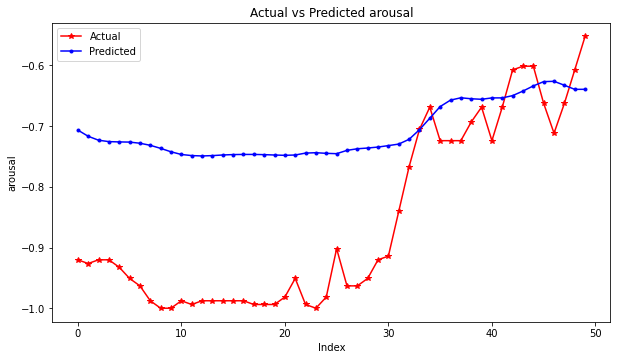

In [36]:
plt.figure(figsize=(10, 5.5))
plt.plot(range(50), df_val.loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_2001_arousal[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted arousal')
plt.ylabel('arousal')
plt.xlabel('Index')

In [37]:
'''
一维CNN实现时间序列预测
'''
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
#先将二维数据转换为三维（样本个数，时间步长，每个时间步长的特征个数），这里将第三维设为1
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),\
                 X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (493, 7, 1) (65, 7, 1)


In [38]:
input_layer = Input(shape=(7,1), dtype='float32')
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)#补零使卷积后数据维数不变
conv1D_layer = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer)
flatten_layer = Flatten()(avgpooling_layer)
dropout_layer = Dropout(0.2)(flatten_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 9, 1)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7, 64)             256       
_________________________________________________________________
average_pooling1d (AveragePo (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 321 

In [39]:
save_weights_at = os.path.join('keras_models', '2001_arousal_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=1,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/20
31/31 [==============================] - 2s 10ms/step - loss: 0.2970 - val_loss: 0.0820

Epoch 00001: val_loss improved from inf to 0.08198, saving model to keras_models/2001_arousal_1DConv_weights.01-0.0820.hdf5
Epoch 2/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0791 - val_loss: 0.0786

Epoch 00002: val_loss improved from 0.08198 to 0.07865, saving model to keras_models/2001_arousal_1DConv_weights.02-0.0786.hdf5
Epoch 3/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0722 - val_loss: 0.0791

Epoch 00003: val_loss did not improve from 0.07865
Epoch 4/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0658 - val_loss: 0.0724

Epoch 00004: val_loss improved from 0.07865 to 0.07238, saving model to keras_models/2001_arousal_1DConv_weights.04-0.0724.hdf5
Epoch 5/20
31/31 [==============================] - 0s 4ms/step - loss: 0.0628 - val_loss: 0.0704

Epoch 00005: val_loss improved from 0.07238 to 0.07040, saving model to k

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
best_model = load_model(os.path.join('keras_models', '2001_arousal_1DConv_weights.15-0.0522.hdf5'))
preds = best_model.predict(X_val)
pred_2001_arousal = np.squeeze(scaler.inverse_transform(preds))
mae = mean_absolute_error(df_val.loc[7:], pred_2001_arousal)
print('MAE for the validation set:', round(mae, 4))#MLP为0.1728,LSTM为0.1515
r2 = r2_score(df_val.loc[7:], pred_2001_arousal)
print('R-squared for the validation set:', round(r2, 4))#0.72816

MAE for the validation set: 0.1796
R-squared for the validation set: 0.4182


Text(0.5, 0, 'Index')

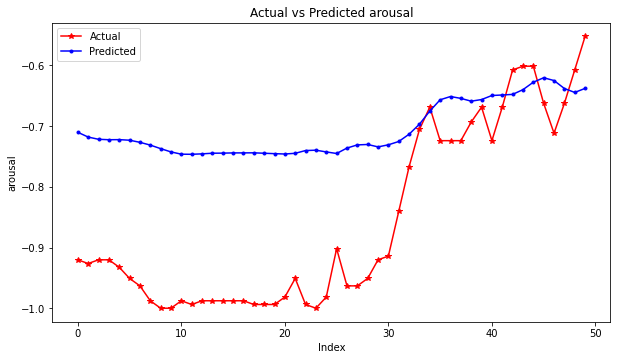

In [41]:
plt.figure(figsize=(10, 5.5))
plt.plot(range(50), df_val.loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_2001_arousal[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted arousal')
plt.ylabel('arousal')
plt.xlabel('Index')

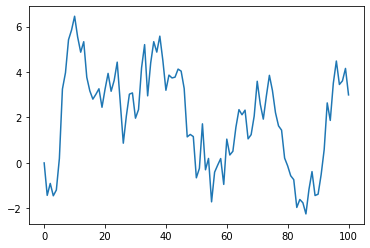

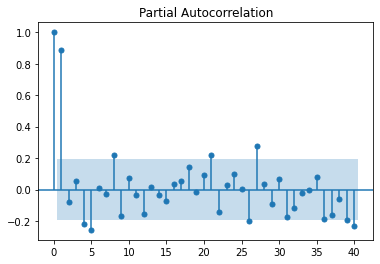

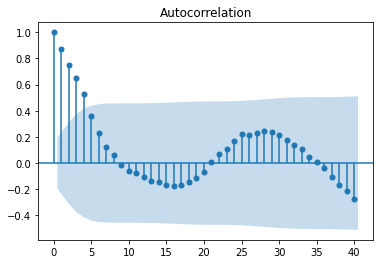

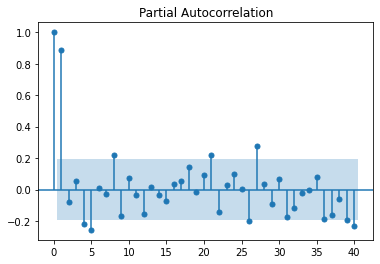

In [42]:
#白噪声序列的自相关与偏相关
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import numpy as np
from matplotlib import pyplot as plt
alpha = 0.9
T = 100
# 设定参数
x = np.empty(T+1)
# 生成长度为T+1的空序列，用来储存x
x[0] = 0
for t in range(T):
    x[t+1] = alpha * x[t] + np.random.randn()
# 用生成的随机数模拟模型
plt.plot(x)
plt.show()
# 绘制图像
plot_acf(x,lags=40)
plot_pacf(x,lags=40)